<a href="https://colab.research.google.com/github/redwankarimsony/kaggle_notebooks/blob/main/Statistical_Analysis_of_Wisconsin_Breast_Cancer_Data_(Plotly).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab library to upload files to notebook
from google.colab import files
from IPython.display import clear_output

# Install Kaggle library
!pip install -q kaggle

# Upload the API Token file
uploaded = files.upload( )
clear_output()

Saving kaggle.json to kaggle.json


In [5]:
!cp /content/kaggle.json /root/.kaggle/

In [ ]:
%cd /content/
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

!unzip breast-cancer-wisconsin-data.zip
!rm breast-cancer-wisconsin-data.zip
!rm -r sample_data
!rm kaggle.json
clear_output()

In [90]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import plotly.graph_objects as go

import warnings


warnings.filterwarnings("ignore")

data = pd.read_csv('/content/data.csv')
data.drop(['Unnamed: 32','id'], axis = 1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## <font color='blue'>Histogram:</font> 
How many times each value appears in dataset. This description is called the distribution of variable
Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value. Frequency = number of times each value appears
Example: `[1,1,1,1,2,2,2].` Frequency of 1 is `four` and frequency of 2 is `three.`

In [19]:
radius_mean_m = data[data['diagnosis'] =='M']['radius_mean']
radius_mean_b = data[data['diagnosis'] =='B']['radius_mean']

fig = go.Figure()
fig.add_trace(go.Histogram(x=radius_mean_b, name = 'Benign'))
fig.add_trace(go.Histogram(x=radius_mean_m, name = 'Malignant'))

# Overlay both histograms
fig.update_layout(title = 'Histogram Comparison of radius_mean', 
                  title_x = 0.5,
                  xaxis_title ='Radius Mean Value ->',
                  yaxis_title = 'Value Counts ->',
                  barmode='overlay')

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()
print(f'Mean of radius_mean values (Benign): {radius_mean_b.mean()}')
print(f'Mean of radius_mean values (Malignant): {radius_mean_m.mean()}')

Mean of radius_mean values (Benign): 12.14652380952381
Mean of radius_mean values (Malignant): 17.46283018867925


### &#9673;<font color = 'blue'> Understanding Histogram Plot </font>
1. From this graph you can see that `radius_mean` of malignant tumors are bigger than `radius_mean` of benign tumors mostly.
2. The benign distribution (blue in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution). However the same is not true for the malignant class data. It concludes that, malignant class `radius_mean` is a bit erratic
3. Also you can find out that the mean value of malignant is higher than that of benign class. 




##  <font color = 'blue'> Finding Outliers </font>
1. When you are looking at histogram as you can see there are rare values in malignant distribution (red in graph)
2. There values can be errors or rare events. These errors and rare events can be called outliers
3. **Calculating outliers:**
* first we need to calculate first quartile $(Q1)(25\%)$ 
* then find `IQR(inter quartile range) = Q3-Q1`
* finally compute `Q1 - 1.5IQR` and `Q3 + 1.5IQR`
* Anything outside this range is an outlier lets write the code for bening tumor distribution for feature `radius_mean`

For visually inspecting the outliers, [Box Plot](https://plotly.com/python/box-plots/) is an excellent choice. 

In [45]:
radius_mean_m = data[data['diagnosis'] =='M']['radius_mean']
radius_mean_b = data[data['diagnosis'] =='B']['radius_mean']

# Calculating Qurtile Points
desc = radius_mean_b.describe()
print(desc)
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Finding Outliers
a = radius_mean_b[radius_mean_b < lower_bound].values 
b = radius_mean_b[radius_mean_b > upper_bound].values
outliers = np.concatenate([a,b], axis = 0)

print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
print(f'Outliers: {outliers}')

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64
Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers: [ 6.981 16.84  17.85 ]


## <font color='blue'>Box Plots:</font> 
A boxplot is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

* **Minimum:** the lowest data point excluding any outliers.
* **Maximum:** the largest data point excluding any outliers.
* **Median (Q2 / 50th percentile):** the middle value of the dataset.
* **First quartile (Q1 / 25th percentile):** also known as the lower quartile $q_n(0.25)$, is the median of the lower half of the dataset.
* **Third quartile (Q3 / 75th percentile):** also known as the upper quartile $q_n(0.75)$, is the median of the upper half of the dataset.

An important element used to construct the box plot by determining the minimum and maximum data values feasible, but is not part of the aforementioned five-number summary, is the `interquartile range` or `IQR` denoted below:

**Interquartile range (IQR):** is the distance between the upper and lower quartiles.

$${\displaystyle {\text{IQR}}=Q_{3}-Q_{1}=q_{n}(0.75)-q_{n}(0.25)}$$
A boxplot is constructed of two parts, a box and a set of whiskers shown in the following figure. The lowest point is the minimum of the data set and the highest point is the maximum of the data set. The box is drawn from `Q1` to `Q3` with a horizontal line drawn in the middle to denote the median.

In [54]:
radius_mean_m = data[data['diagnosis'] =='M']['radius_mean']
radius_mean_b = data[data['diagnosis'] =='B']['radius_mean']

fig = go.Figure()
fig.add_trace(go.Box(y=radius_mean_m, name='Malignant', marker_color = 'indianred'))
fig.add_trace(go.Box(y=radius_mean_b, name = 'Benign', marker_color = 'lightseagreen'))

fig.update_layout(title='Distribution of radius_mean for Benign and Malignant Class',
                  title_x = 0.5,
                  xaxis_title = 'Feature',
                  yaxis_title = 'Value',
                  height = 400,
                  width = 800)
fig.show()

## <font color='blue'> Summary Statistics</font>
* Mean
* Variance: spread of distribution
* Standart deviation square root of variance
* Lets look at summary statistics all the feature column in the given dataset. 

In [55]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## <font color='blue'>CDF (Cumulative Distribution Function) </font>
1. Cumulative distribution function is the probability that the variable takes a value less than or equal to x. $P(X <= x)$
2. Let's explain in cdf graph of bening radiues mean
in graph, what is $P(12 < X)$? The answer is $0.5$ obviously. 
3. The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.
You can plot cdf with two different method

In [64]:
def ecdf(x):
    x = np.sort(x)
    def result(v):
        return np.searchsorted(x, v, side='right') / x.size
    return result

fig = go.Figure()
fig.add_scatter(x=np.unique(radius_mean_b), 
                y=ecdf(radius_mean_b)(np.unique(radius_mean_b)), 
                line_shape='hv')

fig.update_layout(title='CDF plot for the feature radius_mean', title_x = 0.5,   
                  xaxis_title = 'Radius Mean Value',
                  yaxis_title = 'CDF',
                  height = 400, width = 600)
fig.show()

## <font color='blue'>Relationship Between Variables</font>
1. We can say that two variables are related with each other, if one of them gives information about others
For example, price and distance. If you go long distance with taxi you will pay more. Therefore, we can say that price and distance are positively related with each other.

2. Scatter Plot is the simplest way to check relationship between two variables. Let's look at the relationship between `radius_mean` and `area_mean`

3. In the following scatter plot you can see that when radius mean increases, area mean also increases Therefore, they are positively correlated with each other.

<Figure size 1080x576 with 0 Axes>

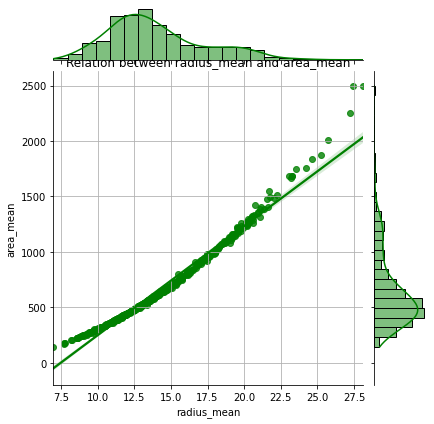

<Figure size 1080x576 with 0 Axes>

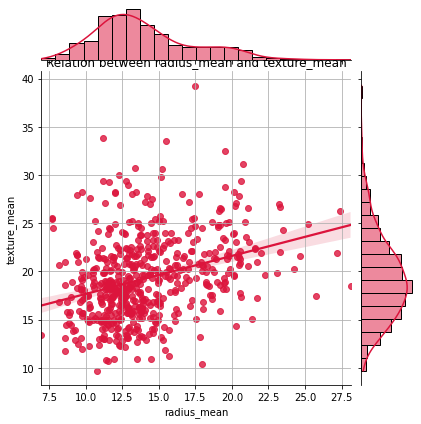

In [82]:
plt.figure(figsize = (15,8))
sns.jointplot(x = data['radius_mean'], y= data['area_mean'] ,kind="reg", color='green')
plt.title('Relation between radius_mean and area_mean')
plt.grid()
plt.show()

plt.figure(figsize = (15,8))
sns.jointplot(x = data['radius_mean'], y= data['texture_mean'] ,kind="reg", color='crimson')
plt.title('Relation between radius_mean and texture_mean')
plt.grid()
plt.show()

### &#9673; <font color='blue'>Observation:</font> 
1. Here in the first figure (green one), we see that both of the features `radius_mean` and `area_mean` are highly dependent on each other. As a result, they are positively correlated. 
2. In the second figure (pink one), both of the features are kind of independent from each other and there is little dependency among them.

It is also easier to observe the relation between more than two features.





## <font color='blue'>Multiple Feature Correlation:</font> 

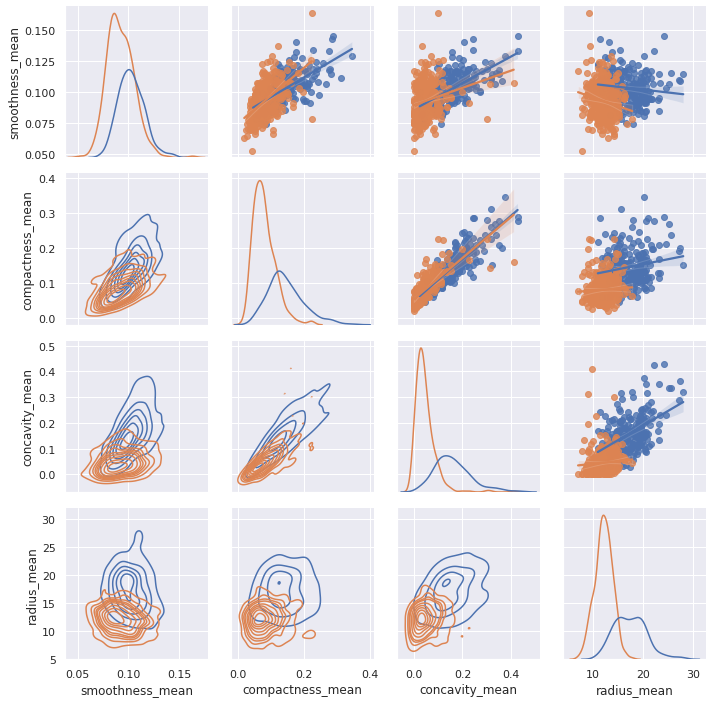

In [113]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "darkgrid")
# df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se" ]]
df = data[['diagnosis', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'radius_mean']]
g = sns.PairGrid(df, hue = 'diagnosis',diag_sharey = False)
g.map_upper(sns.regplot )
g.map_lower(sns.kdeplot, color = 'blue')
g.map_diag(sns.kdeplot, color = 'green')
plt.show()

Similar things can also be simulated by `sns.pairplot()` function. There is something interesting observation here. For the Benign data there is one correlation and for Malignant data there is another relation.

In [ ]:
df = data[['diagnosis', 'smoothness_mean','compactness_mean',	'concavity_mean']]
g = sns.pairplot(df, hue = 'diagnosis', )
g.map_lower(sns.kdeplot, color = 'blue')
g.map_upper(sns.regplot)

## <font color='blue'> Correlation (Pearson) </font>
A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between two variables or features. The variables may be two columns of a given data set of observations, often called a sample, or two components of a multivariate random variable with a known distribution. 

Pearson correlation coefficient `(r)`: 

<font color='blue'> $$r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}$$ </font>
where <br>
$r$	=	correlation coefficient <br>
$x_{i}$	=	values of the x-variable in a sample<br>
$\bar{x}$	=	mean of the values of the x-variable<br>
$y_{i}$	=	values of the y-variable in a sample<br>
$\bar{y}$	=	mean of the values of the y-variable

Let's have a look at the correlation of all the features. 



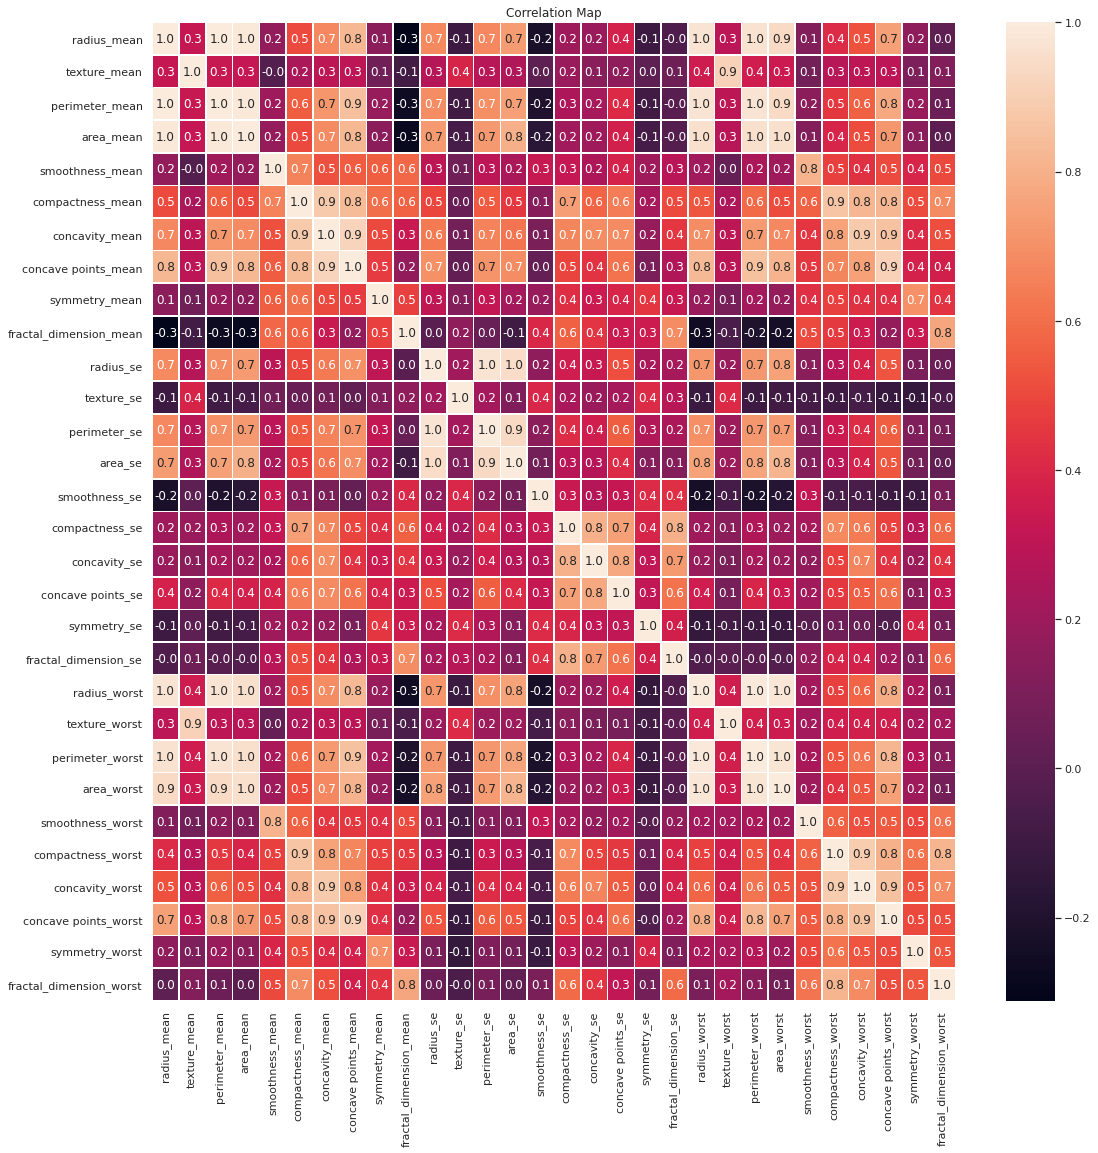

In [129]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(method='pearson'),annot= True,linewidths=0.6,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Pearson Correlation Map')
plt.savefig('graph.png')
plt.show()

### &#9673; <font color='blue'> Understanding the Pearson Correlation Matrix: </font>
Its a Huge matrix that includes a lot of numbers. But to understand it, you need to know several things at first. 
1. The range of this numbers are -1 to 1.
2. Meaning of 1 is two variable are positively correlated with each other like `radius_mean` and `area_mean`
3. Meaning of `zero` is there is no correlation between variables like `radius_mean` and `fractal_dimension_se`.
4. Meaning of -1 is two variables are negatively correlated with each other like `radius_mean` and `fractal_dimension_mean`. Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.

## <font color='blue'> Spearman's Rank Correlation </font>
In statistics, Spearman's rank correlation coefficient or Spearman's $rho\ (\rho)$ named after Charles Spearman and often denoted by the Greek letter or as, is a nonparametric measure of rank correlation. It assesses how well the relationship between two variables can be described using a monotonic function. 

$$\rho=1-\frac{6 \sum d_{i}^{2}}{n (n^{2}-1)}$$
where, <br>
$\rho	$ =	Spearman's rank correlation coefficient <br>
$d_{i}	$ =	difference between the two ranks of each observation <br>
$n	$ =	number of observations


|Pearson Moment Correlation | Spearman Rank-order Correlation |
|:--|:--|
|The Pearson correlation evaluates the linear relationship between two continuous variables. <br> A relationship is linear when a change in one variable is associated with a proportional change <br>in the other variable. | The Spearman correlation evaluates the monotonic relationship between two <br>continuous or ordinal variables. In a monotonic relationship, the variables tend <br>to change together, but not necessarily at a constant rate. The Spearman <br>correlation coefficient is based on the ranked values for each variable rather than the raw data. | 
|For example, you might use a Pearson correlation to evaluate whether increases in temperature <br> at your production facility are associated with decreasing thickness of your chocolate coating.| Spearman correlation is often used to evaluate relationships involving ordinal variables. <br>For example, you might use a Spearman correlation to evaluate whether the order in <br> which employees complete a test exercise is related to the number of months they <br> have been employed.|

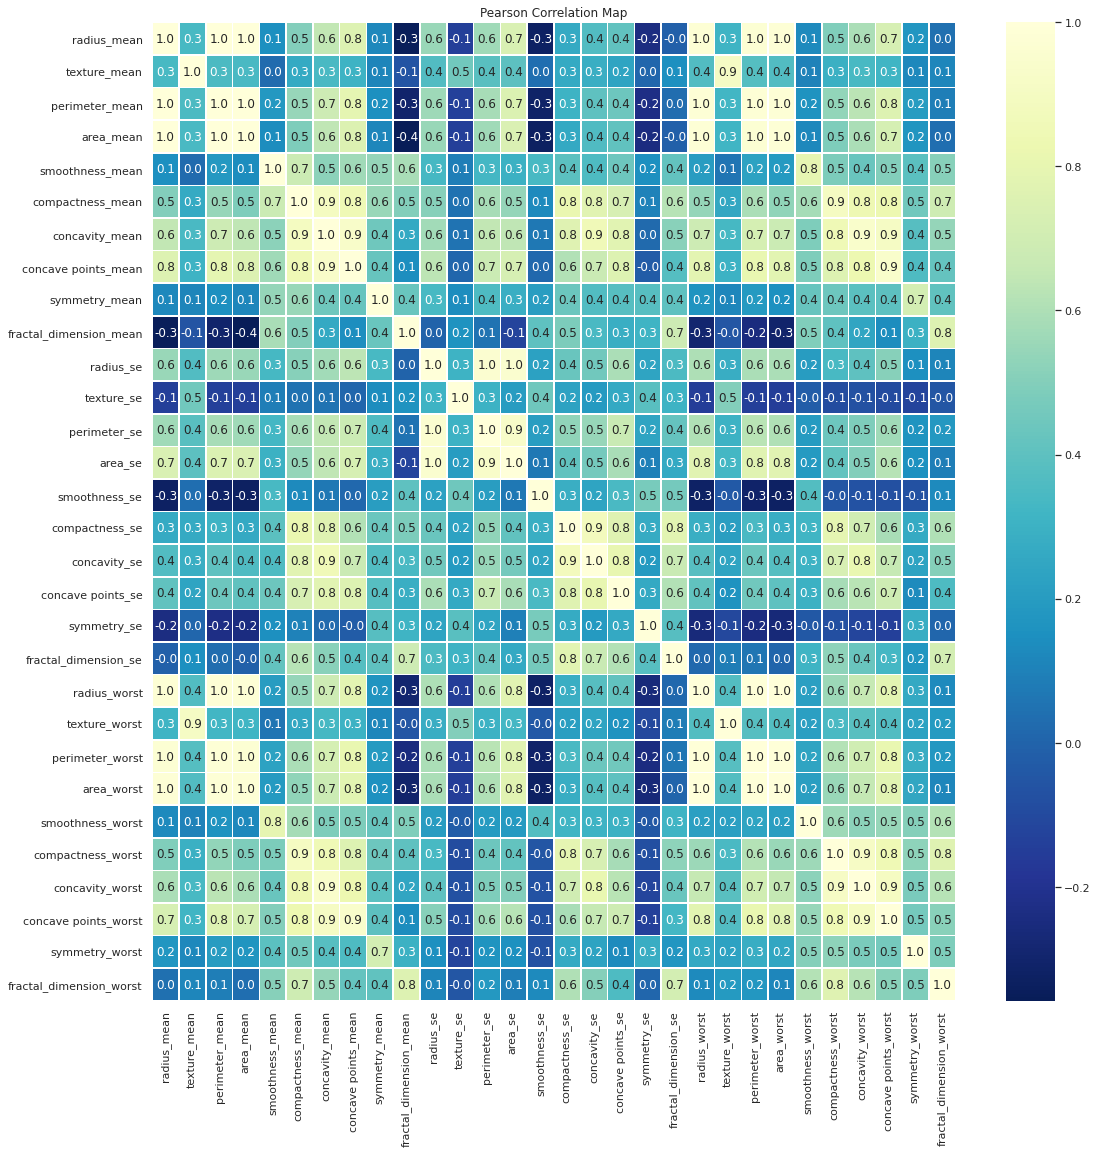

In [136]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(method='spearman'),annot= True,linewidths=0.6,fmt = ".1f",cmap="YlGnBu_r", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Pearson Correlation Map')
plt.savefig('graph.png')
plt.show()

## <font color='blue'> Mean VS Median </font>
* Sometimes instead of mean we need to use median. I am going to explain why we need to use median with an example.

* Let's assume that there are 10 people who work in a company. Boss of the company will make raise in their salary if their mean of salary is smaller than 5



In [139]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


* Mean of salary is 52.5 so the boss thinks that oooo I gave a lot of salary to my employees. And do not makes raise in their salaries.
* However as you know this is not fair and 500(salary) is outlier for this salary list.
Median avoids outliers

In [140]:
print("Median of salary: ",np.median(salary))

Median of salary:  3.0


<a id="14"></a> <br>
## Normal(Gaussian) Distribution and z-score
* Also called bell shaped distribution
* Instead of making formal definition of gaussian distribution, I want to explain it with an example.
* The classic example is gaussian is IQ score.
    * In the world lets say average IQ is 110.
    * There are few people that are super intelligent and their IQs are higher than 110. It can be 140 or 150 but it is rare.
    * Also there are few people that have low intelligent and their IQ is lower than 110. It can be 40 or 50 but it is rare.
    * From these information we can say that mean of IQ is 110. And lets say standart deviation is 20.
    * Mean and standart deviation is parameters of normal distribution.
    * Lets create 100000 sample and visualize it with histogram.

mean:  109.99519641232271
standart deviation:  20.063732640190818


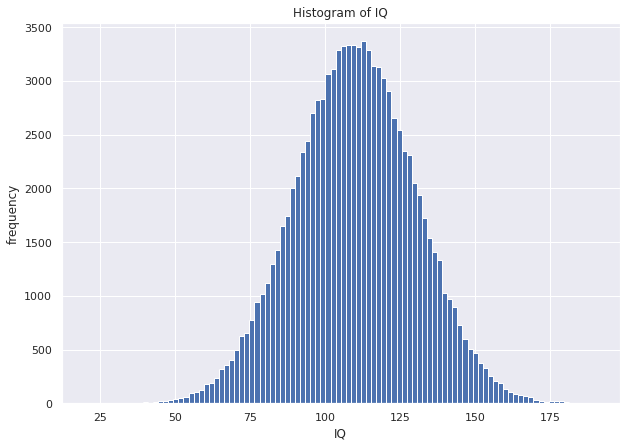

In [142]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, )
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

* As it can be seen from histogram most of the people are cumulated near to 110 that is mean of our normal distribution
* However what is the "most" I mentioned at previous sentence? What if I want to know what percentage of people should have an IQ score between 80 and 140?
* We will use z-score the answer this question. 
      * z = (x - mean)/std 
      * z1 = (80-110)/20 = -1.5
      * z2 = (140-110)/20 = 1.5
      * Distance between mean and 80 is 1.5std and distance between mean and 140 is 1.5std.
      * If you look at z table, you will see that 1.5std correspond to 0.4332
 <a href="https://ibb.co/hys6OT"><img src="https://preview.ibb.co/fYzWq8/123.png" alt="123" border="0"></a>
      * Lets calculate it with 2 because 1 from 80 to mean and other from mean to 140
      * 0.4332 * 2 = 0.8664
      * 86.64 % of people has an IQ between 80 and 140.
  <a href="https://ibb.co/fhc6OT"><img src="https://preview.ibb.co/bUi2xo/hist.png" alt="hist" border="0"></a>

  * What percentage of people should have an IQ score less than 80?
* z = (110-80)/20 = 1.5
* Lets look at table of z score 0.4332. 43.32% of people has an IQ between 80 and mean(110).
* If we subtract from 50% to 43.32%, we ca n find percentage of people have an IQ score less than 80.
* 50-43.32 = 6.68. As a result, 6.68% of people have an IQ score less than 80.